# Simple Linear Regression with external data

In [1]:
import os

In [4]:
os.getcwd()

'D:\\Clients\\Imarticus\\Data Science\\DSP17'

In [3]:
os.chdir('D:\\Clients\\Imarticus\\Data Science\\DSP17')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
datasets = pd.read_csv('Salary_Data.csv')

In [7]:
datasets.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

In [9]:
type(X)

numpy.ndarray

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 12345)

In [11]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Predicting the Test set result ￼
Y_Pred = regressor.predict(X_Test)

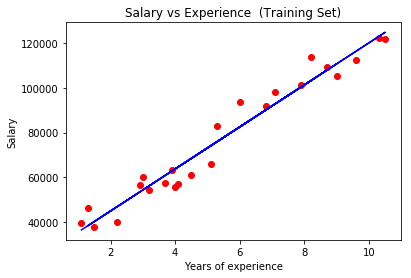

In [13]:
# Visualising the Training set results
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

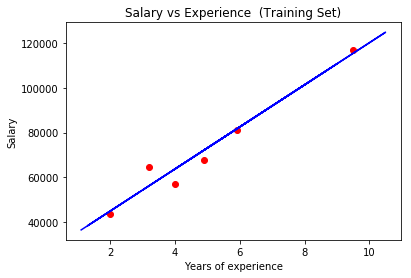

In [14]:
# Visualising the Test set results
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [15]:
Y_Pred

array([115612.05085234,  63707.06397661,  81637.87762459,  44832.52329453,
        72200.60728355,  56157.24770378])

In [19]:
regressor.coef_

array([9437.27034104])

In [22]:
regressor.intercept_

25957.982612444946

In [23]:
# Just take a look at X_Test 
X_Test

array([[9.5],
       [4. ],
       [5.9],
       [2. ],
       [4.9],
       [3.2]])

In [24]:
25957.982612444946 + (9.5 * 9437.27034104)

115612.05085232496

In [25]:
# Predicting for a new value
regressor.predict (10)

array([120330.68602286])

In [26]:
# Check Score (R Squared) of the model
regressor.score(X_Test, Y_Test)

0.9577556268356333

In [29]:
# The coefficient R^2 is defined as (1 - u/v), where 
# u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
# The best possible score is 1.0 
# and it can be negative (because the model can be arbitrarily worse).

# Simple Linear Regression with Internal data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing dataset from scikit-learn
from sklearn.datasets import load_boston
housing_data = load_boston()

In [4]:
# The dataset is a dictionary and now let's see its keys.
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
# Let's check description of the dataset
print (housing_data["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston = pd.DataFrame(housing_data.data)
#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Adding the target column Price to the data frame
boston['Price'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


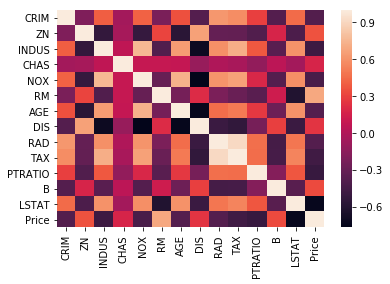

In [10]:
# Correlation between Different features
sns.heatmap(boston.corr())

C:\Users\bsinghal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


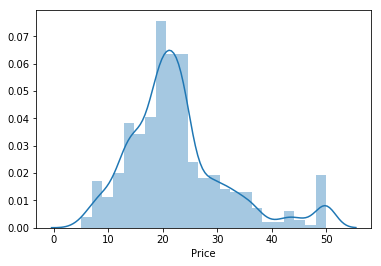

In [11]:
# Distributing of Price Column
sns.distplot(boston['Price'])

In [12]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
# Y is just the target variable
y = boston['Price']

In [13]:
# Now let's split the data into a training set and a testing set. 
# We will train out model on the training set 
# and then use the test set to evaluate the model.

from sklearn.model_selection import train_test_split

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [15]:
# Creating and Training the model
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:

#Train/fit the model to training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Check Score (R Squared) of the model
lr.score(X_test, y_test)

0.6686716272036861

In [19]:
lr.intercept_

25.51382872582616

In [20]:
lr.coef_

array([-1.00694609e-01,  3.10408381e-02,  1.49190291e-02,  1.66332614e+00,
       -1.59064500e+01,  5.02521690e+00, -6.47155087e-04, -1.31335947e+00,
        2.55224973e-01, -1.23308176e-02, -9.04487706e-01,  9.77846528e-03,
       -4.23845563e-01])

In [27]:
#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.100695
ZN,0.031041
INDUS,0.014919
CHAS,1.663326
NOX,-15.906450
RM,5.025217
AGE,-0.000647
DIS,-1.313359
RAD,0.255225
TAX,-0.012331


In [28]:
# Prediction from the model
pred = lr.predict(X_test)

Text(0,0.5,'Predicted prices')

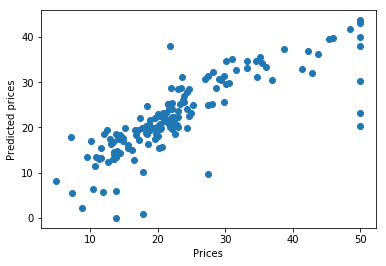

In [29]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [30]:
# Ideally, the scatter plot should create a linear line. 
# Since our linear model does not fit perfectly, 
# the scatter plot is not creating a linear line.

In [31]:
Residuals = y_test - pred

In [32]:
type(Residuals)

pandas.core.series.Series

In [39]:
Residuals.head()

365    17.783454
313    -3.658617
461    -2.243408
158    -3.603618
333    -0.073424
Name: Price, dtype: float64

In [35]:
stddev = Residuals.std()

In [40]:
stddev

5.806163085790155

In [36]:
std_Residuals = Residuals/stddev

In [42]:
std_Residuals.head()

365    3.062858
313   -0.630126
461   -0.386384
158   -0.620654
333   -0.012646
Name: Price, dtype: float64

In [47]:
# Let us do a residuals plot and see? But why?
# If your plots display unwanted patterns, 
# you can’t trust the regression coefficients and other results.

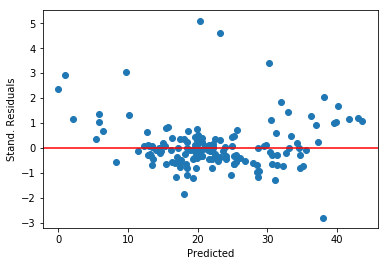

In [46]:
plt.scatter(pred,std_Residuals)
plt.xlabel("Predicted")
plt.ylabel("Stand. Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [48]:
# Homoscedasticity? Or Heteroscedasticity?

In [ ]:
# Summarizing Residuals
# Dependent Variable = Deterministic + Stochastic
# the gap between the expected and observed values must not be predictable. 
# Or, no explanatory power should be in the error. 
# If you can use the error to make predictions about the response, 
# your model has a problem. This issue is where residual plots play a role.

# looking at residual plots, you simply want to determine whether 
# the residuals are consistent with random error. 
# E.g. So, if you record a series of tosses, you should see only random results. 
# If you start to see patterns, you know something is wrong 
# with your model of how the die works. 

# If there are patterns in the errors, this means that 
# you can use one error to predict another
# The purpose of Residuals Plot is to see no pattern in there
# if there are patterns in the residuals, you need to adjust your model

# Only check that residuals are randomly scattered around zero 
# for the entire range of fitted values. Homoscedastic.

# If there is a pattern, it could also mean that you can predict the error
# using the 'predicted' values of response variable.
# This could indicate that the independent variables do not capture 
# the entire deterministic component. Unfortunately, some of the explanatory 
# information has leaked over to the supposedly random error
# The possible causes of such situations are:
    # missing Independent variable.
    # missing Polynomial term to model a curve.
    # missing Interaction term.
    # non-linearity- Can be fixed with higer order polynomials
    # Requirement of Data Transformation (Log works well but what if 0 and negative values?)
        # Log(y+1) in case only zeros are an issue
        # Sqre Root or cube root could be applicable- still allows 0's
# Another variable must not be correlated with the residuals. 
# If a variable is related to the residuals, that variable can predict 
# the residuals, which is a no-no. Try including this variable in the model.